In [6]:
#!pip install scanpy     
# i installed it globally
#!pip install decoupler
#!pip install leidenalg
#!pip install omnipath

# installed them all

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 1.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.1 MB 1.6 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.1 MB 2.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.1 MB 3.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 4.7 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------  2.0/2.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.8 kB ? eta -:--:--
   ---------------------------------------- 56.8/56.8 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import decoupler as dc

In [9]:
#!wget -O GTEX-1HSMQ-5005.h5ad  "https://drive.usercontent.google.com/download?id=1MZ6HmqiCeN5mJd2cYM498PgnNOV8goQ9&export=download&authuser=0&confirm=t&uuid=b3f632b6-8dd3-4cbe-aade-886aad76299c&at=APZUnTV6ape4OEBvDGLvCmNBfgp0%3A1714034617680"


In [8]:
adata = ad.read_h5ad('GTEX-1HSMQ-5005.h5ad')
adata

AnnData object with n_obs × n_vars = 14404 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'gene_biotype', 'gene_length', 'gene_coding_length', 'Approved symbol', 'A

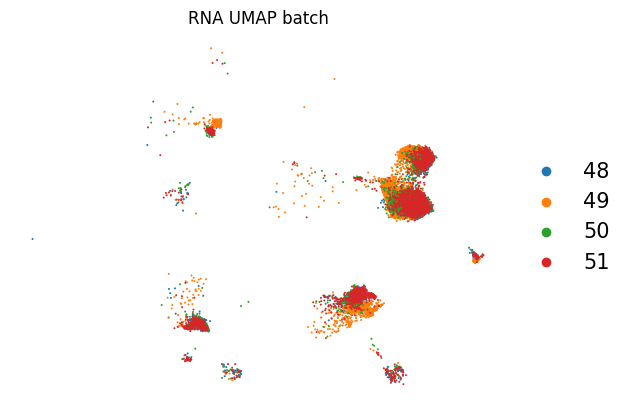

In [9]:
sc.pl.umap(adata, color='batch', title='RNA UMAP batch', frameon=False, legend_fontweight='normal', legend_fontsize=15)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


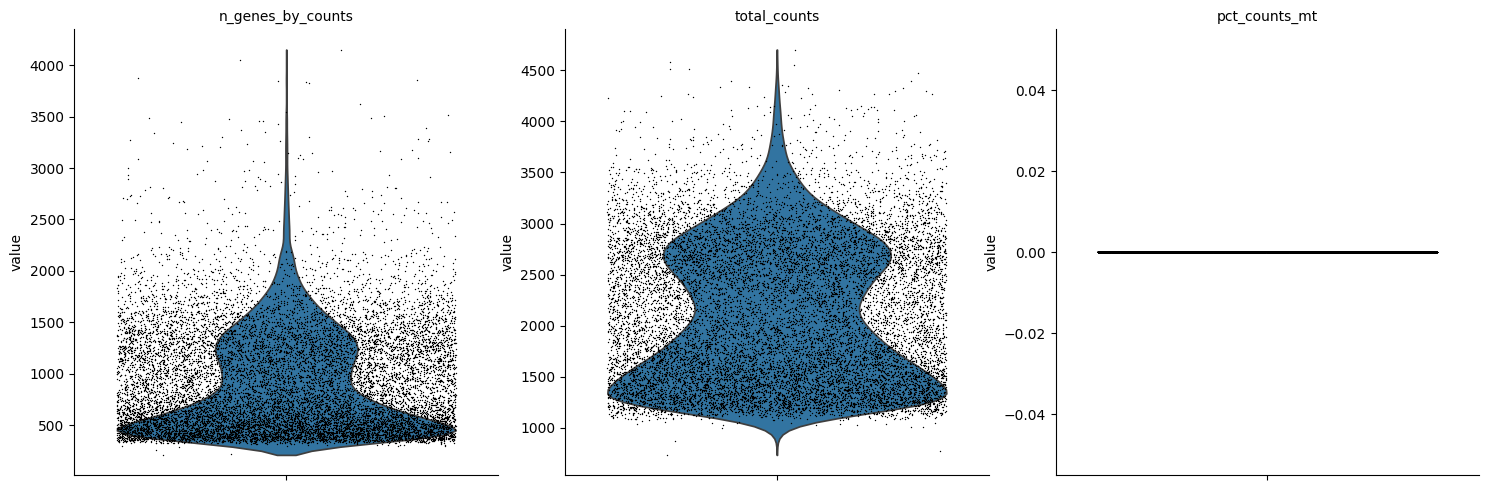

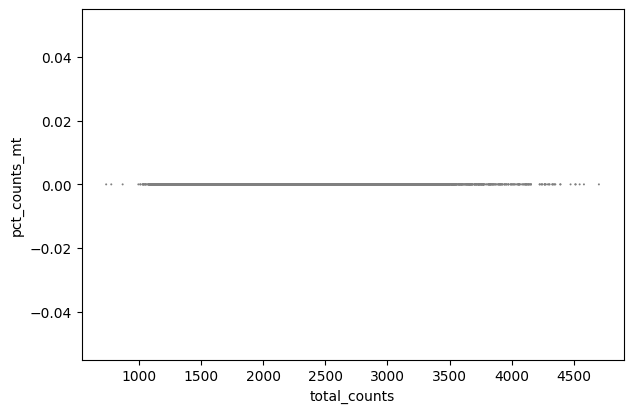

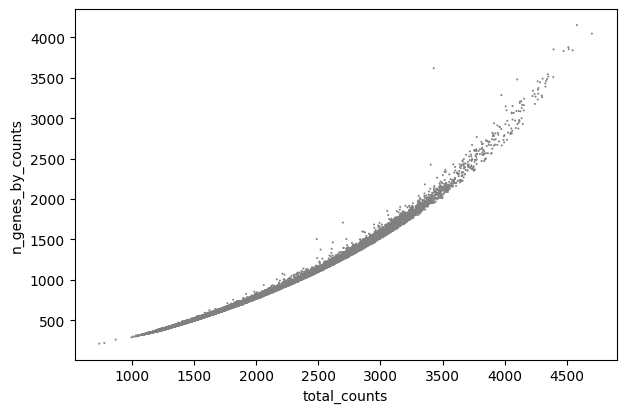

AnnData object with n_obs × n_vars = 14404 × 16803
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', '

In [10]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Analizing data via graphs

adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")
adata

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 2000, :]
adata

View of AnnData object with n_obs × n_vars = 13990 × 16803
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_so

In [12]:

# Normalization (optional)
normalized_adata = adata.copy()
sc.pp.normalize_total(normalized_adata, target_sum=1e4)
sc.pp.log1p(normalized_adata)
normalized_adata.layers['log_norm'] = normalized_adata.X.copy()
normalized_adata

AnnData object with n_obs × n_vars = 13990 × 16803
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', '

In [21]:
'''# Identify the highly variable genes
sc.pp.highly_variable_genes(normalized_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Regress and scale the data
sc.pp.regress_out(normalized_adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(normalized_adata, max_value=10)'''

# Generate PCA features
sc.tl.pca(normalized_adata, svd_solver='arpack')

#Restore X to be norm counts
#dc.swap_layer(normalized_adata, 'log_norm', X_layer_key=None, inplace=True)




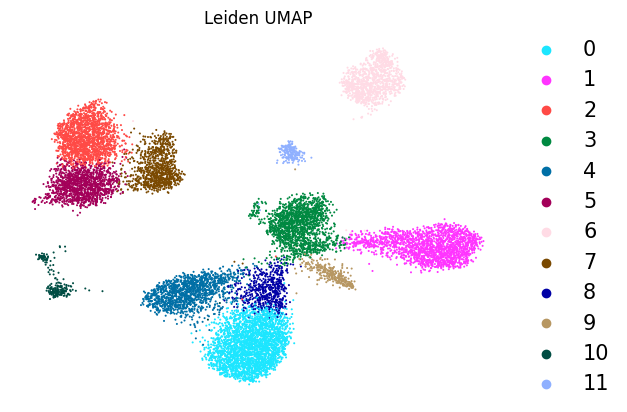

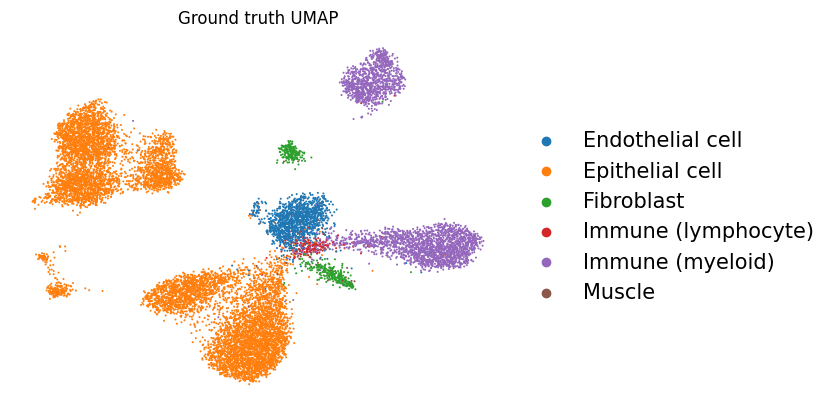

In [22]:
# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(normalized_adata, n_neighbors=10, n_pcs=40)

# Generate UMAP features
sc.tl.umap(normalized_adata)

# Run leiden clustering algorithm
sc.tl.leiden(normalized_adata)

# Visualize
sc.pl.umap(normalized_adata, color='leiden', title='Leiden UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)
sc.pl.umap(normalized_adata, color='Cell types level 2', title='Ground truth UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)

In [24]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin score
davies_bouldin_with_normalization = davies_bouldin_score(normalized_adata.obsm['X_umap'], normalized_adata.obs['leiden'])
print("Davies-Bouldin score with normalization:", davies_bouldin_with_normalization)

Davies-Bouldin score with normalization: 0.5144567198363875


In [29]:

# Generate PCA features
sc.tl.pca(adata, svd_solver='arpack')

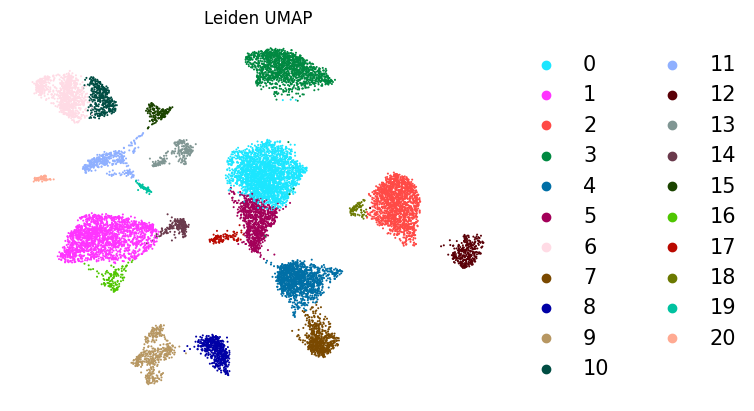

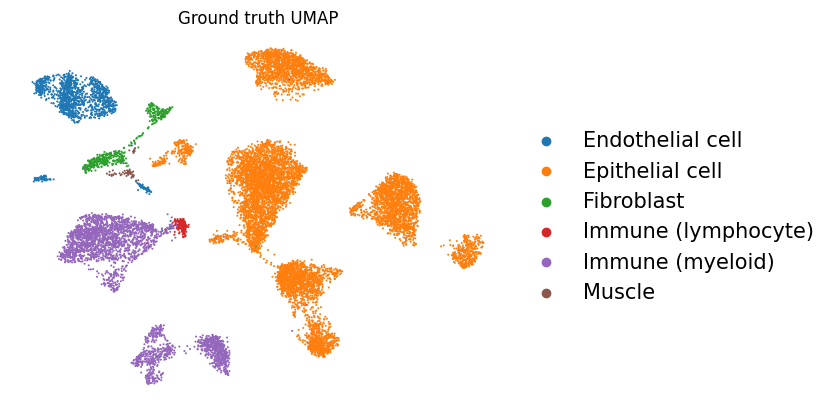

In [30]:

# Compute distances in the PCA space, and find cell neighbors
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Generate UMAP features
sc.tl.umap(adata)

# Run leiden clustering algorithm
sc.tl.leiden(adata)

# Visualize
sc.pl.umap(adata, color='leiden', title='Leiden UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)
sc.pl.umap(adata, color='Cell types level 2', title='Ground truth UMAP',
           frameon=False, legend_fontweight='normal', legend_fontsize=15)


In [32]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin score
davies_bouldin_without_normalization = davies_bouldin_score(adata.obsm['X_umap'], adata.obs['leiden'])
print("Davies-Bouldin score without normalization:", davies_bouldin_without_normalization)

Davies-Bouldin score without normalization: 0.5496098510203377


In [33]:
if davies_bouldin_without_normalization < davies_bouldin_with_normalization:
    print("Davies-Bouldin score without normalization gave a better clustering result! ", davies_bouldin_without_normalization)
elif davies_bouldin_without_normalization > davies_bouldin_with_normalization:
    print("Davies-Bouldin score with normalization gave a better clustering result! ", davies_bouldin_with_normalization)
else:
    print("They gave the same result! ", davies_bouldin_without_normalization)

Davies-Bouldin score with normalization gave a better clustering result!  0.5144567198363875
